<a href="https://colab.research.google.com/github/20144481NguyenMinhTruong/NguyenMinhTruong20144481/blob/main/NHAN_DIEN_KHUON_MAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/NHAN_DIEN_KHUON_MAT

/content/drive/MyDrive/Colab_Notebooks/NHAN_DIEN_KHUON_MAT


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks/NHAN_DIEN_KHUON_MAT/TRAIN',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 158 images belonging to 3 classes.


In [ ]:
training_set.class_indices

{'KO': 0, 'TRUONG': 1, 'TUAN': 2}

In [ ]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks/NHAN_DIEN_KHUON_MAT/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 56 images belonging to 3 classes.


In [ ]:
validation.class_indices

{'KO': 0, 'TRUONG': 1, 'TUAN': 2}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/100
5/5 [==============================] - 75s 15s/step - loss: 9.9259 - accuracy: 0.3038 - val_loss: 0.8751 - val_accuracy: 0.4821
Epoch 2/100
5/5 [==============================] - 32s 7s/step - loss: 0.8013 - accuracy: 0.6013 - val_loss: 0.3392 - val_accuracy: 0.8571
Epoch 3/100
5/5 [==============================] - 32s 7s/step - loss: 0.3387 - accuracy: 0.7975 - val_loss: 0.1556 - val_accuracy: 0.9464
Epoch 4/100
5/5 [==============================] - 32s 7s/step - loss: 0.1807 - accuracy: 0.9304 - val_loss: 0.0821 - val_accuracy: 0.9643
Epoch 5/100
5/5 [==============================] - 32s 7s/step - loss: 0.1111 - accuracy: 0.9557 - val_loss: 0.1081 - val_accuracy: 0.9821
Epoch 6/100
5/5 [==============================] - 32s 7s/step - loss: 0.1222 - accuracy: 0.9747 - val_loss: 0.1314 - val_accuracy: 0.9464
Epoch 7/100
5/5 [==============================] - 32s 7s/step - loss: 0.1547 - accuracy: 0.9051 - val_loss: 0.3046 - val_accuracy: 0.8750
Epoch 8/100
5/5 [=========

In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 1.8276565242558718e-05
Train Accuracy 1.0


<function matplotlib.pyplot.show(*args, **kw)>

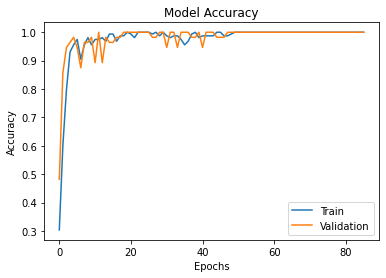

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("Nhan_dien_khuon_mat.h5")

In [ ]:
model_ANN=load_model('Nhan_dien_khuon_mat.h5')

1/1 [==============================] - 0s 19ms/step
TRUONG


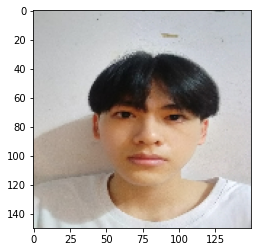

In [ ]:
img=load_img('/content/drive/MyDrive/Colab_Notebooks/NHAN_DIEN_KHUON_MAT/TRAIN/TRUONG/z3826543575266_f0fea3046c4290635751871e6e4f0f5b.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_ANN.predict(img)
if round(result[0][0])==1:
  prediction='KO'
if round(result[0][1])==1:
  prediction='TRUONG'
if round(result[0][2])==1:
  prediction='TUAN'
print(prediction)